# Clase: Teorema del límite central e introducción a las pruebas de hipótesis

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as stats
import seaborn as sns
from scipy.stats import norm
from scipy.stats import t
from scipy import stats

# Omiting WARNINGS
import warnings
warnings.filterwarnings('ignore')

/Applications/anaconda/envs/PythonData/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#!pip install pandas

## 1. Importación de datos:
* Source: A. Bhatnagar and V.K. Mehta (2007). "Efficacy of Deltamethrin and Cyfluthrin Impregnated Cloth Over Uniform Against Mosquito Bites,"Medical Journal Armed Forces India, Vol. 63, pp. 120-122.

* Description: Comparison of 5 pretreated patches to reduce mosquito human contact. 

* 30 replicates per treatment.

* Treatments:

1=Odomos, 2=Deltamethrin, 3=Cyfluthrin, 4=D+O, 5=C+O

* Variables: treatment mosq - The number of mosquitoes caught in one hour (Per Man-Hour Mosquito Catch)

In [5]:
# Importamos datos:
df = pd.read_csv("mosquito.csv")

#df = pd.read_csv("../../Datos/mosquito.csv")

df.head()

,treatment,mosq
0,1,4.50
1,1,10.04
2,1,13.05
3,1,0.26
4,1,10.61


## 2. Graficamos datos

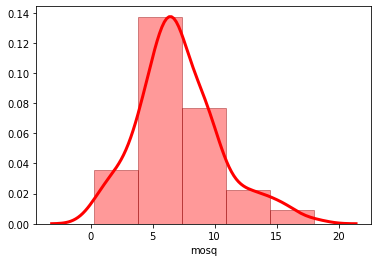

In [6]:
# Gráfica simple Histograma - K-density
X = df['mosq']
sns.distplot(X, hist = True, kde = True,
             bins = 5, color = 'red',
             hist_kws={'edgecolor':'darkred'},
             kde_kws={'linewidth': 3})

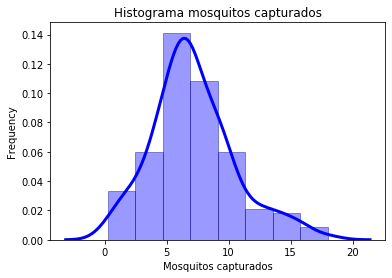

In [7]:
# Gráfica con más adecuaciones: títulos de ejes y de gráfica
X = df['mosq']
#
fig, ax = plt.subplots()
fig = sns.distplot(X, hist = True, kde = True,
             bins=8, color = 'blue',
             hist_kws={'edgecolor':'darkblue'},
             kde_kws={'linewidth': 3})
ax.set_xlabel('Mosquitos capturados')
ax.set_ylabel('Frequency')
ax.set_title('Histograma mosquitos capturados')
plt.show()

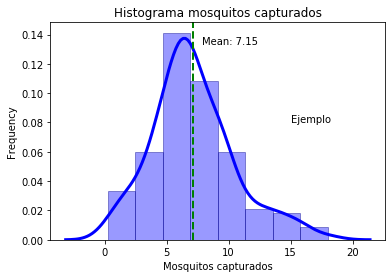

In [8]:
# Gráfica con más adecuaciones
X = df['mosq']
#
fig, ax = plt.subplots()
fig = sns.distplot(X, hist = True, kde = True,
             bins=8, color = 'blue',
             hist_kws={'edgecolor':'darkblue'},
             kde_kws={'linewidth': 3})
ax.set_xlabel('Mosquitos capturados')
ax.set_ylabel('Frequency')
ax.set_title('Histograma mosquitos capturados')
plt.axvline(X.mean(), color = 'green', linestyle = 'dashed', linewidth = 2) # agregamos línea vertical
min_ylim, max_ylim = plt.ylim() # Extraemos límites del eje Y
plt.text(X.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(X.mean())) # Colocamos texto especificando coordenadas
plt.text(15, 0.08, 'Ejemplo')
plt.show()

# H1
## H2
### H3

Texto

$\theta$

$X_i$

$\frac{y_i}{ a^5 } = F_{random}$

## 3. El Teorema del Límite Central

TEO. Sea una muestra aleatoria $\{ W_1, W_2, \ldots, W_n \}$. Supongamos que la pdf asociada a cada $W_i$ tiene una media $\mu$ y una varianza $\sigma^2$. Para cualesquiera valores $a$ y $b$:
    \begin{equation*}
        \lim_{n \rightarrow \infty} P \left( a \leq \frac{W_1 + W_2 + \ldots + W_n - n \mu}{\sqrt{n} \sigma} \leq b \right) = \frac{1}{\sqrt{2 \pi}} \int_a^b e^{- \frac{z^2}{2}} dz
    \end{equation*}

Del teorema anterior podemos mostrar los siguientes resultados. Partamos de la primer parte de la ecuación del teorema:
\begin{eqnarray*}
    P \left( a \leq \frac{W_1 + \ldots + W_n - n \mu}{\sqrt{n} \sigma} \leq b \right) & = & P \left( a \leq \frac{\frac{W_1 + \ldots + W_n}{n} - \mu}{\frac{\sigma}{\sqrt{n}}} \leq b \right) \\
    & = & P \left( a \leq \frac{\overline{W} - \mu}{\frac{\sigma}{\sqrt{n}}} \leq b \right)
\end{eqnarray*}

Por lo tanto, de acuerdo con el Teorema del Límite Central, tomanndo el límite podemos afirmar que para cualquier muestra aleatoria de una pdf, cuando $n$ tiende a infinito, lo siguiente será cierto:
\begin{equation*}
    \lim_{n \rightarrow \infty} P \left( a \leq \frac{\overline{W} - \mu}{\frac{\sigma}{\sqrt{n}}} \leq b \right) = \frac{1}{\sqrt{2 \pi}} \int_a^b e^{- \frac{z^2}{2}} dz
\end{equation*}


In [9]:
# Media y Desviación Estándar de la población:
Mu = df['mosq'].mean()
Sigma = df['mosq'].std()

# Imprimimos el resultado de la Media y Desviación Estándar
Mu, Sigma

(7.153333333333333, 3.3566443507674664)

In [10]:
# Muestreo:
df['mosq'].sample(n = 5, replace = True)

101     4.07
136     4.82
8       6.90
133    10.54
117     6.56
Name: mosq, dtype: float64

In [11]:
# Media de la muestra
df['mosq'].sample(n = 5, replace = True).mean()

9.67

In [12]:
# Tranformación Z (asumiendo que la media y desviación calculas son las poblacionales)
(df['mosq'].sample(n = 5, replace = True).mean() - Mu)/(Sigma/np.sqrt(5))

-0.37527110283127607

In [13]:
# Haciendo un loop con un FOR:
for i in range(1, 5):
    print(f'Esta es la iteración: {i}')

Esta es la iteración: 1
Esta es la iteración: 2
Esta es la iteración: 3
Esta es la iteración: 4


In [14]:
# 
Arreglo = ['Elemento 1', 'Elemento 2', 'Elemento 3', 'Elemento 4']

for i in Arreglo:
    print(f'Esta es la iteración: {i}')

Esta es la iteración: Elemento 1
Esta es la iteración: Elemento 2
Esta es la iteración: Elemento 3
Esta es la iteración: Elemento 4


In [15]:
# Sistematizamos MUESTREO
# Arreglos para ir guardando las medias muestrales de K muestras
array1 = []
array2 = []
array3 = []
array4 = []

# El muestreo será repetido...
K = 300

# LOOP para hacer K muestreos de diferentes tamaños de muestra:
n1 = 10
n2 = 30
n3 = 60
n4 = 1000

# Hacemos 
for i in range(1, K):
    array1.append((df['mosq'].sample(n = n1, replace = True).mean() - Mu)/(Sigma/np.sqrt(n1)))
    array2.append((df['mosq'].sample(n = n2, replace = True).mean() - Mu)/(Sigma/np.sqrt(n2)))
    array3.append((df['mosq'].sample(n = n3, replace = True).mean() - Mu)/(Sigma/np.sqrt(n3)))
    array4.append((df['mosq'].sample(n = n4, replace = True).mean() - Mu)/(Sigma/np.sqrt(n4)))

In [18]:
#array4

## 4. Grafiquemos los resultados

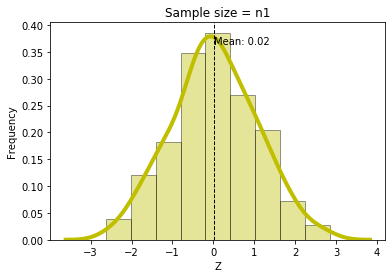

In [19]:
# Caso n1
fig, ax = plt.subplots()
fig = sns.distplot(array1, hist = True, kde = True,
             bins = 9, color = 'y',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_xlabel('Z')
ax.set_ylabel('Frequency')
ax.set_title('Sample size = n1')
plt.axvline(np.mean(array1), color = 'k', linestyle = 'dashed', linewidth = 1)
min_ylim, max_ylim = plt.ylim()
plt.text(np.mean(array1)*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(np.mean(array1)))
plt.show()

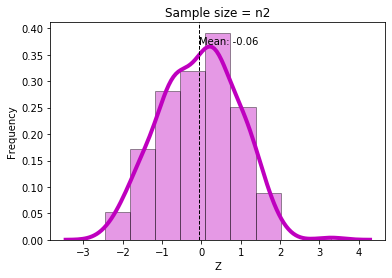

In [20]:
# Caso n2
fig, ax = plt.subplots()
fig = sns.distplot(array2, hist=True, kde=True,
             bins = 9, color = 'm',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_xlabel('Z')
ax.set_ylabel('Frequency')
ax.set_title('Sample size = n2')
plt.axvline(np.mean(array2), color = 'k', linestyle = 'dashed', linewidth = 1)
min_ylim, max_ylim = plt.ylim()
plt.text(np.mean(array2)*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(np.mean(array2)))
plt.show()

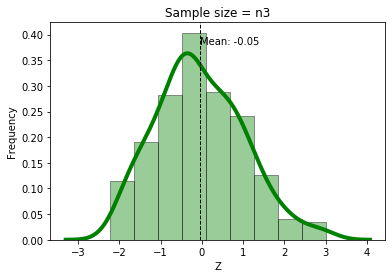

In [21]:
# Caso n3
fig, ax = plt.subplots()
fig = sns.distplot(array3, hist = True, kde = True,
             bins = 9, color = 'g',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_xlabel('Z')
ax.set_ylabel('Frequency')
ax.set_title('Sample size = n3')
plt.axvline(np.mean(array3), color = 'k', linestyle = 'dashed', linewidth = 1)
min_ylim, max_ylim = plt.ylim()
plt.text(np.mean(array3)*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(np.mean(array3)))
plt.show()

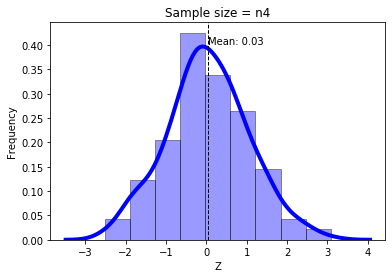

In [22]:
# Caso n4
fig, ax = plt.subplots()
fig = sns.distplot(array4, hist = True, kde = True,
             bins = 9, color = 'b',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_xlabel('Z')
ax.set_ylabel('Frequency')
ax.set_title('Sample size = n4')
plt.axvline(np.mean(array4), color = 'k', linestyle = 'dashed', linewidth = 1)
min_ylim, max_ylim = plt.ylim()
plt.text(np.mean(array4)*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(np.mean(array4)))
plt.show()

## 5. Pruebas de Hipótesis paras Medias

Sea $\{ X_1, X_2, \ldots, X_n \}$ una muestra aleatoria de tamaño $n$ de una población con función de densidad de probabilidad normal estándar ($N(0, 1)$), donde $\sigma$ es conocida. Sea:
\begin{equation*}
    Z = \frac{\overline{X} - \mu_0}{\frac{\sigma}{\sqrt{n}}}
\end{equation*}

En este caso cabe aclarar que todas las pruebas estan basadas en muestras aleatorias tomadas de poblaciones con distribuciones normales o, en su caso, son muestras suficientemente grandes ($n > 30$) para utilizar la aproximación normal que nos da el uso del Teorema del Límite Central. Partamos suponiendo que queremos probar alguna de las siguientes hipótesis:
\begin{eqnarray}
    H_0 & : & \mu = \mu_0 \nonumber \\
    H_a & : & 
        \begin{cases}
            \mu \neq \mu_0 \\
            \text{ o } \\
            \mu > \mu_0 \\
            \text{ o } \\
            \mu < \mu_0
        \end{cases}
    \label{H0_Medias}
\end{eqnarray}


Dada la hipótesis nula proponemos las siguientes regiones críticas o de su rechazo respectivas a las hipótesis alternativas en la ecuación anterior:
\begin{equation*}
    \begin{cases}
        | Z | \geq z_{\alpha/2} \\
        \text{ o } \\
        Z \geq z_\alpha \\
        \text{ o } \\
        Z \leq - z_\alpha
    \end{cases}
\end{equation*}


In [23]:
# Establescamos los parámetros de la normal:
Mu = 8.8 
Sigma = 10

# Muestras de una Normal (Mu, Sigma)
np.random.normal(Mu, Sigma, 5)

array([ 9.5023201 , 10.69645742, 25.72134519,  6.27655676, 11.73018028])

In [24]:
# Muestra para aplicar Hipótesis:

# Tamaño:
n = 15

#
Sample = np.random.normal(Mu, Sigma, n)
Sample

array([-6.47395891, 16.24446998, 10.02722753,  1.60692061, 18.73927156,
       14.6270308 ,  0.44378451, -2.58260801, -2.60502544, -0.27465474,
        0.95961606, 12.28319434,  7.12916192,  4.5217821 , -8.10229457])

In [25]:
Sample.mean()

4.43626118220622

Supongamos que queremos probar que la hipótesis de que la muestra tiene una media igual a la media de donde se extrajo la muestra, contra la alternativa de que la media es menor:
$$H_0 : \mu = 8.8$$
$$H_1 : \mu < 8.8$$

In [26]:
# Transformación Z:

Z = (Sample.mean() - Mu)/(Sigma/np.sqrt(n))
Z

-1.6900687768514155

In [27]:
# Utilizamos la función de probabilidad acumulada:

norm.cdf(0), norm.cdf(1.96), norm.cdf(- 1.96)

(0.5, 0.9750021048517795, 0.024997895148220435)

In [28]:
1 - norm.cdf(1.96)

0.024997895148220484

In [29]:
# ¿Aceptamos o rechazamos la Hipótesis Nula?

P_Value = 1 - norm.cdf(abs(Z))
P_Value

0.04550739873063003

¿Qué pasa cuando desconocemos la varianza? En esos casos, al igual que en los intervalos de confianza, utilizaremos una estadística:
\begin{equation*}
    T = \frac{\overline{X} - \mu_0}{\frac{\hat{\sigma}}{\sqrt{n}}} \sim t_{[n - 1]}
\end{equation*}

En estos casos, de forma similar queremos probar las hipótesis de la ecuación mostradas anteriormente, para la cual proponemos las siguientes regiones críticas o de su rechazo, respectivamente,  con las hipótesis alternativas:
\begin{equation*}
    \begin{cases}
        | T | \geq t_{[\alpha/2, n -1]} \\
        \text{ o } \\
        T \geq t_{[\alpha, n -1]} \\
        \text{ o } \\
        T \leq - t_{[\alpha, n -1]}
    \end{cases}
\end{equation*}

In [30]:
# Tomaremos 1 muestra de nuestro Data Frame de mosquitos:
Mu = df['mosq'].mean()

Mu

7.153333333333333

In [31]:
# Muestra de la base
N = 20

Sample = df['mosq'].sample(n = N, replace = True)
Sample

117     6.56
36      2.26
52      6.12
5      10.89
77      5.38
9       5.69
92     12.49
77      5.38
81      7.08
49      8.33
148     4.58
86      9.30
87      6.37
142     4.59
8       6.90
38      9.06
94      3.99
114     5.99
84     10.22
142     4.59
Name: mosq, dtype: float64

In [32]:
# Desviación estándar:
Sigma = Sample.std()
Sigma

2.55893743367705

Supongamos que queremos probar que la hipótesis de que la muestra tiene una media igual a la media de donde se extrajo la muestra, contra la alternativa de que la media es menor:
$$H_0 : \mu = 7$$
$$H_1 : \mu > 7$$

In [33]:
# Transformación T:
Media = Sample.mean()

T = (Media - Mu)/(Sigma/np.sqrt(N))

Media, T

(6.788500000000001, -0.6376022508834251)

In [34]:
1 - t.cdf(abs(T), N - 1)

0.2656709860387845